<a href="https://colab.research.google.com/github/amisiespoir-07/IMG_CLASSIFIER-GHW/blob/main/Image_Classification_Hallf_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bi

In [3]:
import tensorflow as tf
import os

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
#Avoid DOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
tf.config.list_physical_devices('GPU')

[]

# 2. Separate Dataset (Data Preparation)


In [8]:
import cv2
import imghdr

#Import Keras and the MNIST Dataset

In [9]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
print("X training original shape: ", X_train.shape)
print("Y training original shape: ", Y_train.shape)

X training original shape:  (60000, 28, 28)
Y training original shape:  (60000,)


In [12]:
print(X_train[0])
print("Shape: "+ str(X_train[0].shape))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [13]:
print(Y_train[0])
print("Shape: "+ str(Y_train[0].shape))

5
Shape: ()


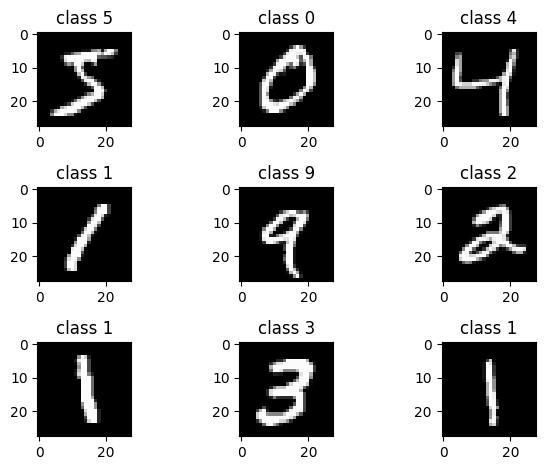

In [11]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("class {}".format(Y_train[i]))

plt.tight_layout()

#convert images into a vector using cnn

In [14]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [15]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [16]:
print("training matrix shape:", X_train.shape)

training matrix shape: (60000, 784)


Hot encoding numbers form 0-9

In [17]:
nb_calsses = 10
Y_train = tf.keras.utils.to_categorical(Y_train, nb_calsses)
Y_test = tf.keras.utils.to_categorical(Y_test, nb_calsses)

In [18]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [19]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(512, input_shape=(784)),
        tf.keras.layers.Activation('relu'),
    ]
)

TypeError: 'int' object is not iterable